### **Initialization**

In [1]:
## This Notebook is just the refreshment of Pandas Basics such as "groupby" ##
# Initialization
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### **Downloading the Dependencies**

In [2]:
# Downloading the Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### **Getting the Data**

In [3]:
# Getting the Data
# I am doing this Project on Colab so, the process of reading Data might be different.
path = "/content/drive/My Drive/Predicting Future Sales"


# Creating the DataFrames
transactions = pd.read_csv(os.path.join(path, "sales_train.csv.gz"))
items = pd.read_csv(os.path.join(path, "items.csv.zip"))
item_categories = pd.read_csv(os.path.join(path, "item_categories.csv"))
shops = pd.read_csv(os.path.join(path, "shops.csv"))

### **Looking at the Data**

In [4]:
# Inspecting and Observing the Data
## Transactions DataFrame ## 
transactions.shape
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
## Items DataFrame ##
items.shape
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
## Item Categories DataFrame ##
item_categories.shape
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
## Shops DataFrame ##
shops.shape
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


**What will be maximum Total Revenue among all shops in September, 2014 ?**


In [8]:
# What will be Total Revenue among all shops in September, 2014 ?
# Changing into Datetime Object
transactions["date"] = pd.to_datetime(transactions["date"], format="%d.%m.%Y")
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [9]:
# Selecting only the September of 2014
date_range = pd.date_range(start="2014-09-01", end="2014-09-30")
n_transactions = transactions[transactions['date'].isin(date_range)]
n_transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
1953691,2014-09-24,20,5,1039,899.0,1.0
1953692,2014-09-27,20,5,1015,449.0,1.0
1953693,2014-09-07,20,5,1329,399.0,1.0
1953694,2014-09-27,20,5,984,399.0,1.0
1953695,2014-09-08,20,5,984,399.0,1.0


In [10]:
# Calculating the Total Sales in each day of September, 2014
n_transactions["sale"] = n_transactions["item_price"] * n_transactions["item_cnt_day"]
n_transactions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,sale
1953691,2014-09-24,20,5,1039,899.0,1.0,899.0
1953692,2014-09-27,20,5,1015,449.0,1.0,449.0
1953693,2014-09-07,20,5,1329,399.0,1.0,399.0
1953694,2014-09-27,20,5,984,399.0,1.0,399.0
1953695,2014-09-08,20,5,984,399.0,1.0,399.0


In [11]:
# Calculating the Total Revenues
revenue = n_transactions["sale"].groupby(n_transactions["shop_id"]).sum()
print(f"Total Maximum Revenue in Sep,2014 is {revenue.max()} from shop {revenue.idxmax()}")

Total Maximum Revenue in Sep,2014 is 7982852.199999956 from shop 31


**Which Item generated the Highest Revenue in summer, 2014?**

In [12]:
# Which item generated the Highest Revenue in summer, 2014?
# Changing the datarange
date_range = pd.date_range(start='2014-06-01', end="2014-08-30")
nn_transactions = transactions[transactions["date"].isin(date_range)]
i_transactions = pd.merge(nn_transactions, items, how="inner", on="item_id")
i_transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2014-06-15,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
1,2014-06-03,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
2,2014-06-08,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
3,2014-06-11,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30
4,2014-06-19,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30


In [13]:
# Calculating the Revenue / Sales
i_transactions["sale"] = i_transactions["item_price"] * i_transactions["item_cnt_day"]
i_transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,sale
0,2014-06-15,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
1,2014-06-03,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0
2,2014-06-08,17,26,9532,399.0,1.0,"В тылу врага: Штурм 2 [PC, Jewel, русская версия]",30,399.0


In [14]:
# Calculating the Highest Revenue on Items
item_rev = i_transactions["sale"].groupby(i_transactions["item_category_id"]).sum()
print(f"Highest Revenue was collected form item {item_rev.idxmax()}")

Highest Revenue was collected form item 20


**How many Items remain, or Price remains constant during whole period of time?**


In [15]:
# Observing the Transactions DataFrame again.
transactions.head(3)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.0,1.0
1,2013-01-03,0,25,2552,899.0,1.0
2,2013-01-05,0,25,2552,899.0,-1.0


In [16]:
# Calculating the number of Items whose price remains constant during Whole Period of Time.
separate = transactions["item_price"].groupby(transactions["item_id"])
nums = []
for idx, sep in separate:
  if len(sep.unique()) == 1:
    nums.append(idx)

print(f"Number of Items whose Price remains constant during whole time is {len(nums)}")

Number of Items whose Price remains constant during whole time is 5926


**What was the variance of the Number of Items sold per day per sequence for the particular shop on December, 2014?**

In [19]:
# Calculating the Variance of the number of Items sold per day per sequence for the shop, 25
# Creating the new date_range
date_range = pd.date_range(start="2014-12-01", end="2014-12-31")
dec_transactions = transactions[transactions["date"].isin(date_range)]
dec_transactions = dec_transactions[dec_transactions["shop_id"] == 25]
dec_transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2295837,2014-12-14,23,25,21752,399.0,1.0
2295838,2014-12-13,23,25,21752,399.0,3.0
2295839,2014-12-26,23,25,21733,149.0,1.0
2295840,2014-12-31,23,25,21732,149.0,1.0
2295841,2014-12-30,23,25,21726,149.0,1.0


In [20]:
groups = dec_transactions["item_cnt_day"].groupby(dec_transactions["date"]).sum()
print(f'Variance of the Items sold is {groups.var()}')


Variance of the Items sold is 117167.70229885059


### **Plotting the Items sold vs Days**

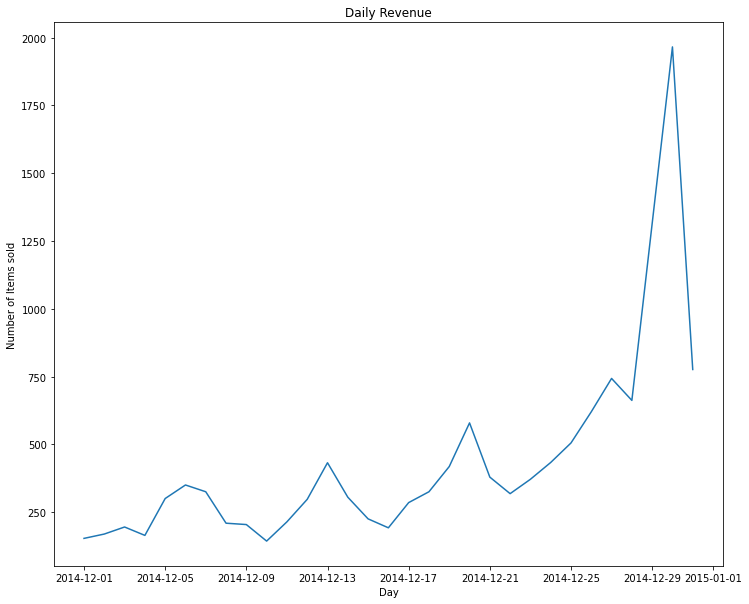

In [26]:
num_sold = groups.values
days = groups.index

# Plotting the Lineplot
plt.figure(figsize=(12, 10))
plt.plot(days, num_sold)
plt.xlabel("Day")
plt.ylabel("Number of Items sold")
plt.title("Daily Revenue")
plt.show()